<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/cursos/classificacao_roupas_mnist_2020/notebooks/neural_networks_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import load_model

Carregando o Dataset

In [ ]:
dataset = keras.datasets.fashion_mnist  # Puxando o data set do keras
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()  # Dando nomes às tuplas do data set

4422102/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [ ]:
len(imagens_treino) # Verificando a quantidade de imagens do data set
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()  # Descobrindo a quantidade de imagens diferentes do array
identificacoes_treino.max()

9

Exibição dos dados

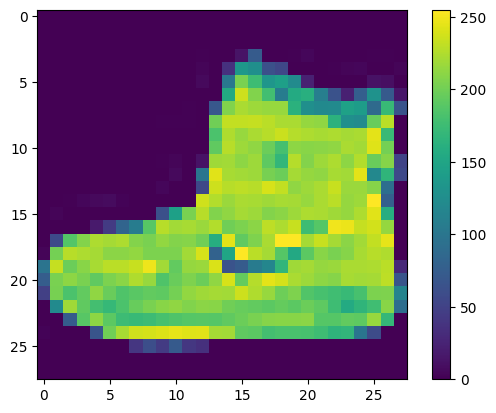

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália',
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])  # Plot do plt para a imagem
plt.title(identificacoes_treino[0])

for imagem in range (10): # Plotando todas as 10 imagens diferentes usando o subplots em loop
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [ ]:
imagens_treino = imagens_treino / float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (2)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr = 0.002)

parando_cedo = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
                keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.hdf5',
                                                monitor = 'val_loss', save_best_only = True)]

modelo.compile(optimizer = adam,
                loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,
                       epochs = 5,
                       validation_split = 0.2,
                       callbacks = parando_cedo)

NameError: ignored

Sumário do modelo

In [ ]:
#resumo do modelo
sumario_do_modelo = modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.02511591, -0.040952  ,  0.01232042, ...,  0.01548341,
         0.04081683, -0.05264731],
       [-0.04421272,  0.04279454,  0.03497355, ..., -0.02105347,
        -0.06949791, -0.01927506],
       [ 0.01126665,  0.05196831,  0.06368962, ...,  0.01852058,
        -0.03434442, -0.02813127],
       ...,
       [ 0.07499686, -0.04341292,  0.03698741, ...,  0.01253216,
        -0.06960301, -0.06364551],
       [ 0.04358606, -0.05757919,  0.03762484, ..., -0.0020218 ,
         0.00171304,  0.06318678],
       [-0.00059082,  0.09782524,  0.03533447, ...,  0.00584605,
         0.01945706,  0.03765782]], dtype=float32)

In [ ]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

'\nmodelo.layers[1].set_weights(\n    [pesos_camada_dense_zerados, vieses_camada_dense]\n)\n'

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [ ]:
modelo.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 63.4464 - accuracy: 0.4184 - val_loss: 7.9321 - val_accuracy: 0.7505
Epoch 2/5
1500/1500 [==============================] - 11s 8ms/step - loss: 16.8981 - accuracy: 0.6299 - val_loss: 6.2227 - val_accuracy: 0.7282
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 7.0802 - accuracy: 0.6777 - val_loss: 3.2634 - val_accuracy: 0.7250
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 3.5705 - accuracy: 0.7038 - val_loss: 2.0211 - val_accuracy: 0.7746
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 1.9019 - accuracy: 0.7390 - val_loss: 1.3348 - val_accuracy: 0.7492


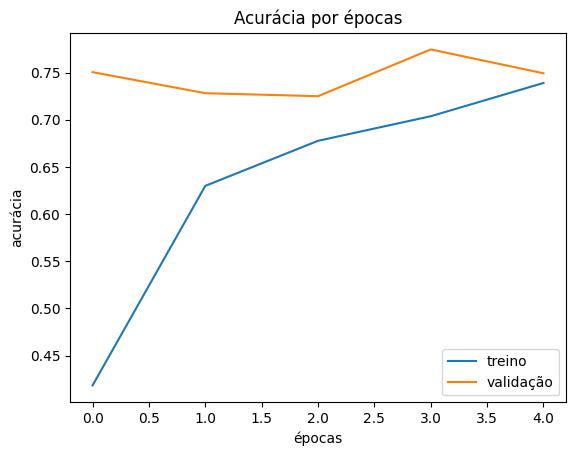

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

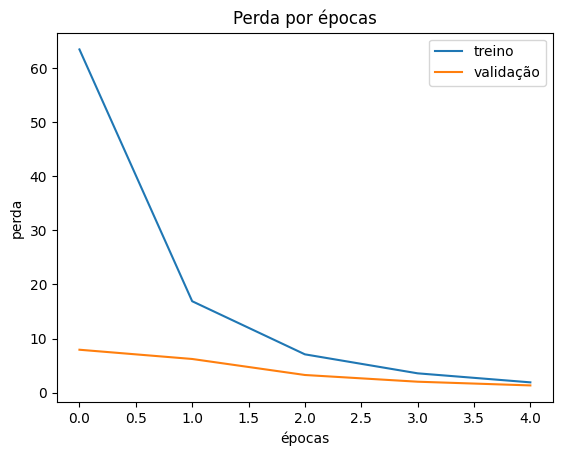

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época  

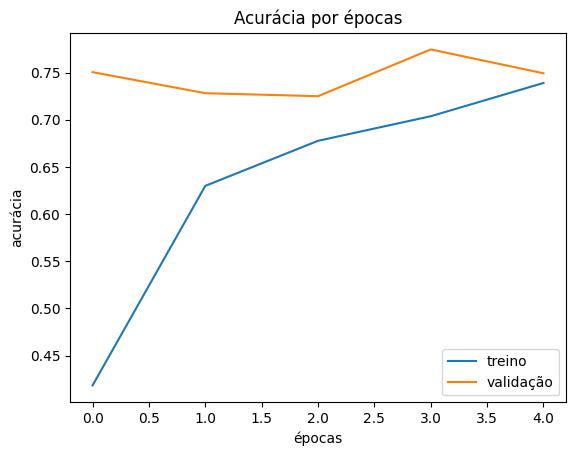

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

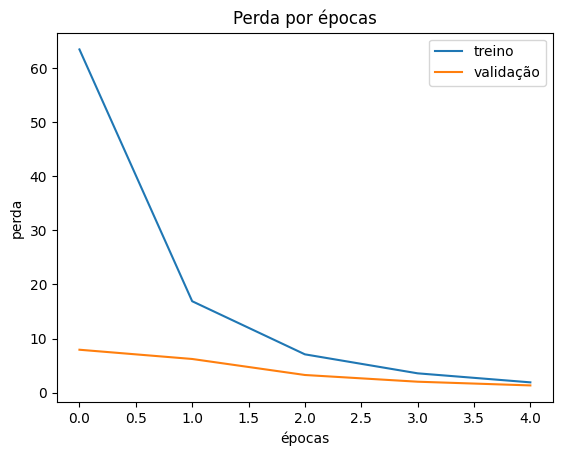

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('Resultado teste:', np.argmax(testes[1]))
print('Número da imagem da teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem da teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
Resultado teste: 2
Número da imagem da teste: 2
313/313 [==============================] - 1s 3ms/step
Resultado teste modelo salvo 2
Número da imagem da teste: 2


Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 376.6945 - accuracy: 0.7121
Perda do teste: 376.6944885253906
Acurácia do teste: 0.7121000289916992
